importing nessasary libraries and datasets

In [17]:
import tensorflow as tf
import keras
import emnist
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

extracting the required images and downloading from EMNIST dataset

In [18]:
from emnist import extract_training_samples, extract_test_samples

# Download and extract the EMNIST dataset for numbers
emnist.extract_training_samples('digits')
emnist.extract_test_samples('digits')

# Download and extract the EMNIST dataset for letters
#emnist.extract_training_samples('letters')
#emnist.extract_test_samples('letters')

#train_images_letters, train_labels_letters = extract_training_samples('letters')
#test_images_letters, test_labels_letters = extract_test_samples('letters')

train_images_numbers, train_labels_numbers = extract_training_samples('digits')
test_images_numbers, test_labels_numbers = extract_test_samples('digits')


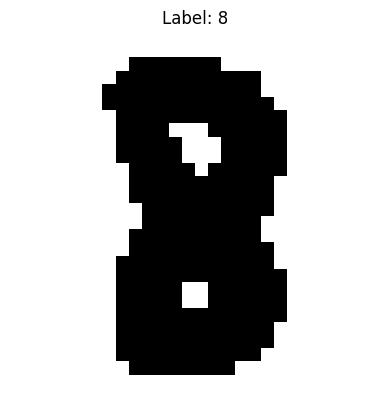

In [21]:
# Normalize the pixel values between 0 and 1
#train_images_letters = np.where(train_images_letters > 0,1,0)
#test_images_letters = np.where(test_images_letters > 0,1,0)

train_images_numbers = np.where(train_images_numbers > 0,1,0)
test_images_numbers = np.where(test_images_numbers > 0,1,0)

#create new classes for letters from 1-26 to 11-36 to train in the same model
#train_labels_letters = train_labels_letters + 10
#test_labels_letters = test_labels_letters + 10

import random
i = random.randint(1,40000)

plt.imshow(train_images_numbers[i], cmap='binary')
plt.title(f"Label: {train_labels_numbers[i]}")
plt.axis('off')
plt.show()

In [22]:
#plt.imshow(train_images_letters[i], cmap='binary')
#plt.title(f"Label: {train_labels_letters[i]}")
#plt.axis('off')
#plt.show()

In [23]:
# Reshape the images to (28, 28, 1)
train_images_numbers = train_images_numbers.reshape(-1, 28, 28, 1)
test_images_numbers = test_images_numbers.reshape(-1, 28, 28, 1)

#train_images_letters = train_images_letters.reshape(-1, 28, 28, 1)
#test_images_letters = test_images_letters.reshape(-1, 28, 28, 1)

# combining the training and testing data set for both letters and digits
#X_train = np.concatenate((train_images_numbers, train_images_letters), axis=0)
#X_test = np.concatenate((test_images_numbers, test_images_letters), axis=0)
#Y_train = np.concatenate((train_labels_numbers, train_labels_letters), axis=0)
#Y_test = np.concatenate((test_labels_numbers, test_labels_letters), axis=0)

In [24]:
# Define the input shape
input_shape = (28, 28, 1)

# Define the model architecture
inputs = keras.Input(shape=input_shape)
x = keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu")(inputs)
x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(64, activation="relu")(x)
outputs = keras.layers.Dense(10, activation="softmax")(x)

# Create the model
model = keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the model
model.fit(train_images_numbers, train_labels_numbers, batch_size=32, epochs=5, validation_split=0.1)





Epoch 1/5
6750/6750 [==============================] - 68s 10ms/step - loss: 0.1239 - accuracy: 0.9622 - val_loss: 0.0689 - val_accuracy: 0.9793
Epoch 2/5
6750/6750 [==============================] - 69s 10ms/step - loss: 0.0572 - accuracy: 0.9824 - val_loss: 0.0667 - val_accuracy: 0.9790
Epoch 3/5
6750/6750 [==============================] - 68s 10ms/step - loss: 0.0420 - accuracy: 0.9869 - val_loss: 0.0537 - val_accuracy: 0.9835
Epoch 4/5
6750/6750 [==============================] - 66s 10ms/step - loss: 0.0321 - accuracy: 0.9900 - val_loss: 0.0549 - val_accuracy: 0.9836
Epoch 5/5
6750/6750 [==============================] - 71s 11ms/step - loss: 0.0241 - accuracy: 0.9923 - val_loss: 0.0555 - val_accuracy: 0.9841


In [25]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images_numbers, test_labels_numbers)

1250/1250 [==============================] - 4s 3ms/step - loss: 0.0496 - accuracy: 0.9856


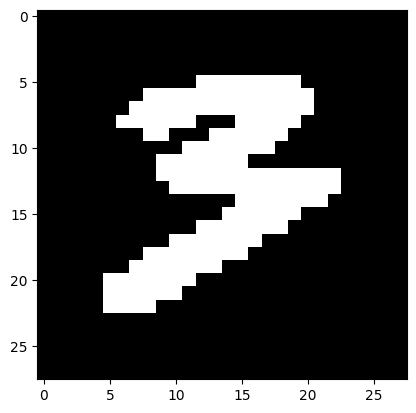

1/1 [==============================] - 0s 62ms/step
Predicted class: 3


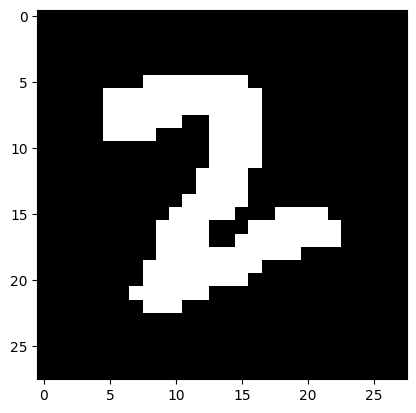

1/1 [==============================] - 0s 44ms/step
Predicted class: 2


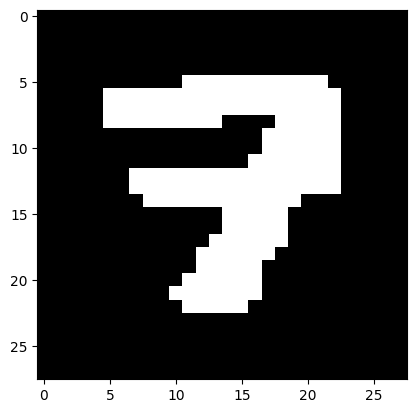

1/1 [==============================] - 0s 36ms/step
Predicted class: 7



----------------Contoured Image--------------------


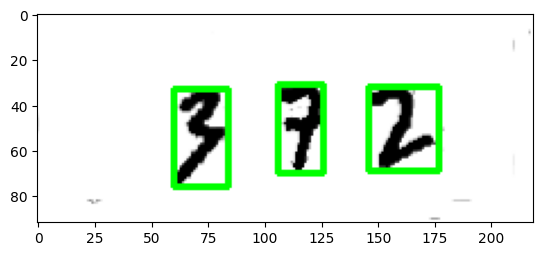

In [36]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

image = cv.imread('new_1.png')
grey = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
grey = cv.GaussianBlur(grey,(5,5),0)
thresh = cv.adaptiveThreshold(grey,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY_INV,11,5)
contours, hierarchy = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
#nums = []
preprocessed_digits = []
#i = 0
for c in contours:
    x,y,w,h = cv.boundingRect(c)    
    if w*h >= 200: 
        cv.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
        digit = thresh[y:y+h, x:x+w]
        resized_digit = cv.resize(digit, (18,18))
        padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
        padded_digit = np.where(padded_digit > 0,1,0)
        plt.imshow(padded_digit, cmap="gray")
        plt.show()
        xdigit = padded_digit.reshape(-1, 28, 28, 1)
        prediction = model.predict(xdigit)
        # Get the predicted class label
        predicted_class = np.argmax(prediction)
        #nums[i] = predicted_class

        # Print the predicted class label
        print("Predicted class:", predicted_class)
        #i = i + 1
print("\n\n\n----------------Contoured Image--------------------")
plt.imshow(image, cmap="gray")
plt.show()
#print("nums")

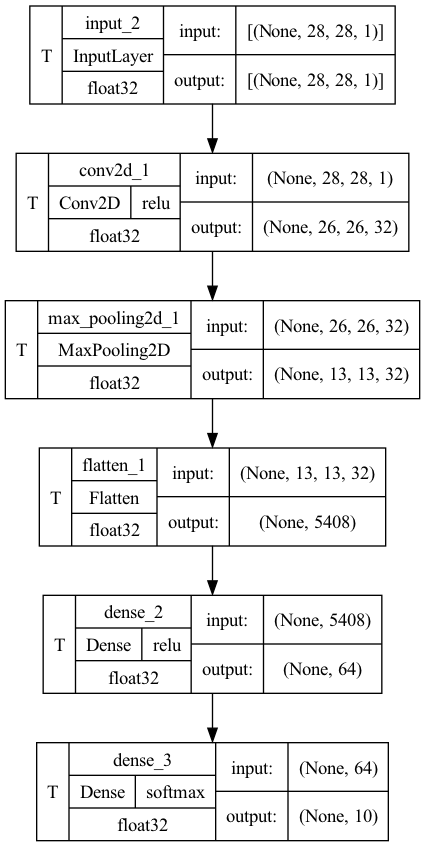

In [29]:

tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
    show_trainable=True,
)